# Homework Starter — Stage 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [19]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
n = 160
df = pd.DataFrame({
    'date': pd.date_range('2021-02-01', periods=n, freq='D'),
    'region': np.random.choice(['North','South','East','West'], size=n),
    'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    'transactions': np.random.poisson(lam=3, size=n),
})
base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)

# inject a bit of missingness and outliers
df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12
df.head()

,date,region,age,income,transactions,spend
0,2021-02-01,West,37.6,28086.81,4,73.35
1,2021-02-02,North,43.0,33034.75,1,52.37
2,2021-02-03,South,38.2,50045.39,2,131.85
3,2021-02-04,South,24.9,39467.28,4,147.58
4,2021-02-05,South,59.8,31201.65,1,86.76


## 1) First look

In [20]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          160 non-null    datetime64[ns]
 1   region        160 non-null    object        
 2   age           160 non-null    float64       
 3   income        155 non-null    float64       
 4   transactions  160 non-null    int32         
 5   spend         157 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 7.0+ KB


(None,
 date            0
 region          0
 age             0
 income          5
 transactions    0
 spend           3
 dtype: int64)

## 2) Numeric profile

In [21]:
desc = df[['age','income','transactions','spend']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
age,160.0,40.018750,8.458676,22.00,34.70,40.15,44.925,61.10,0.069538,-0.080125
income,155.0,41983.866323,13262.457038,17928.80,32471.53,39332.52,49697.690,87052.40,0.993336,0.918722
transactions,160.0,3.237500,2.585610,0.00,2.00,3.00,4.000,20.00,3.466078,19.984802
spend,157.0,117.291592,51.768645,0.54,77.25,119.32,153.340,280.05,0.130860,-0.084917


## 3) Distributions (TODO: add at least 3)

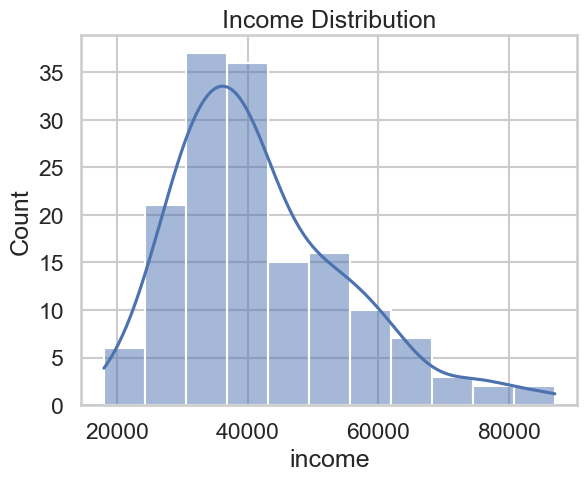

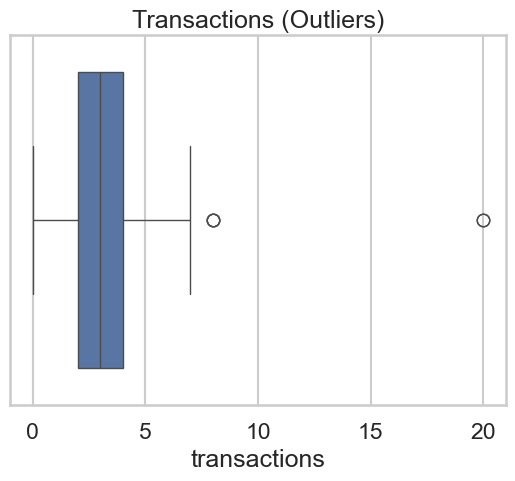

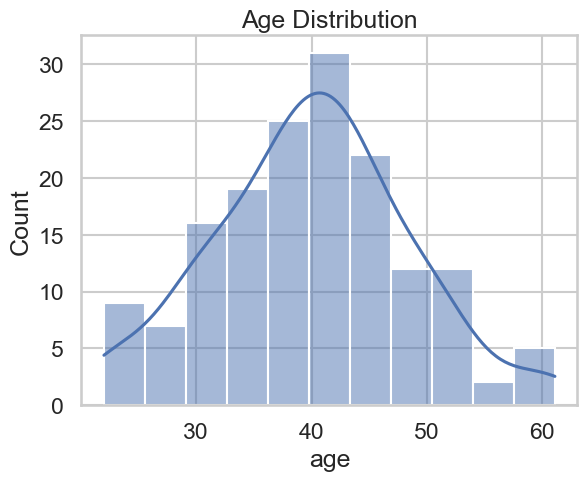

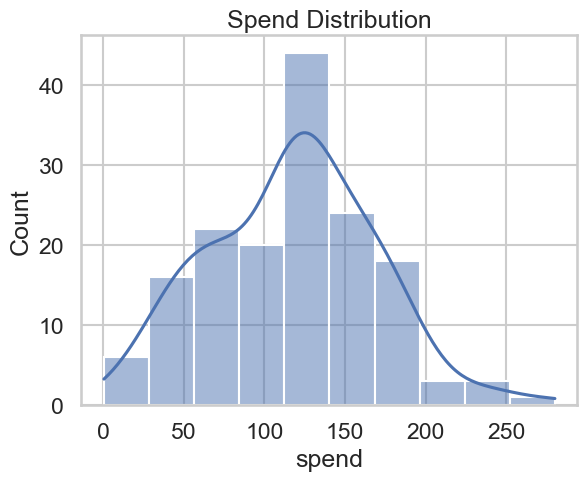

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Income distribution (histogram + KDE)
sns.histplot(df['income'], kde=True)
plt.title('Income Distribution')
plt.show()

# 2) Transactions distribution (boxplot to check for outliers)
sns.boxplot(x=df['transactions'])
plt.title('Transactions (Outliers)')
plt.show()

# 3) Age distribution (histogram + KDE)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# 4) Optional: Spend distribution (extra plot)
sns.histplot(df['spend'], kde=True)
plt.title('Spend Distribution')
plt.show()


## 4) Relationships (TODO: add at least 2)

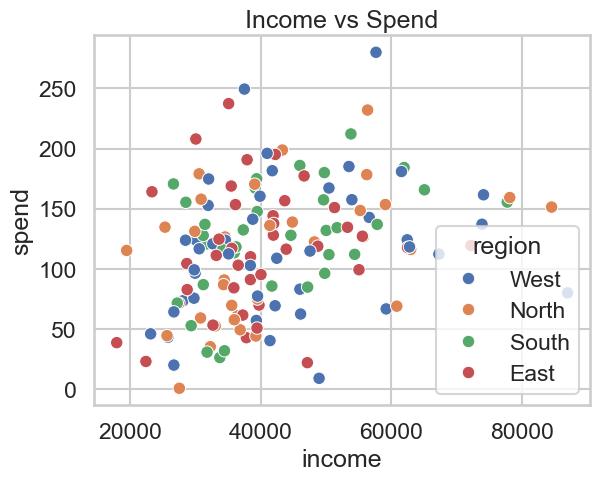

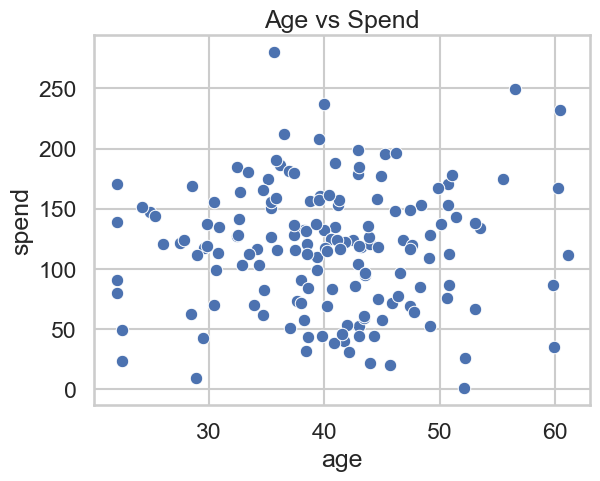

In [23]:


# 1) Relationship between income and spend, colored by region
sns.scatterplot(data=df, x='income', y='spend', hue='region')
plt.title('Income vs Spend')
plt.show()

# 2) Relationship between age and spend
sns.scatterplot(data=df, x='age', y='spend')
plt.title('Age vs Spend')
plt.show()


## 5) (Optional) Correlation matrix

相关性矩阵：
                   age    income  transactions     spend
age           1.000000 -0.123160      0.037754  0.008174
income       -0.123160  1.000000      0.063573  0.307307
transactions  0.037754  0.063573      1.000000  0.480685
spend         0.008174  0.307307      0.480685  1.000000


C:\Users\go199\AppData\Local\Temp\ipykernel_36236\1668227578.py:18: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\go199\AppData\Local\Temp\ipykernel_36236\1668227578.py:18: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\go199\AppData\Local\Temp\ipykernel_36236\1668227578.py:18: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\go199\AppData\Local\Temp\ipykernel_36236\1668227578.py:18: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\go199\AppData\Local\Temp\ipykernel_36236\1668227578.py:18: UserWarning: Glyph 30697 (\N{CJK UNIFIED IDEOGRAPH-77E9}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\go199\AppData\Local\Temp\ipykernel_36236\1668227578.py:18: UserWarning: Glyph 38453 (\N{CJK UNIFIED IDEOGRAPH-9635})

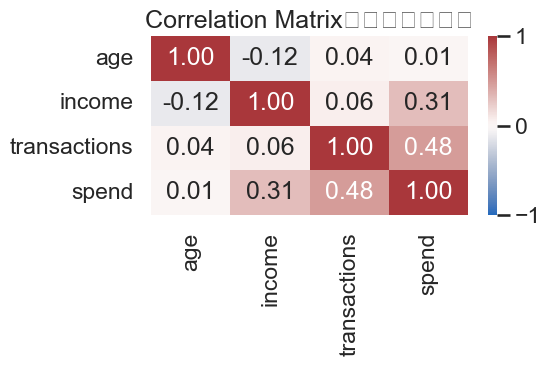

In [ ]:


corr = df[['age','income','transactions','spend']].corr(numeric_only=True)


print("相关性矩阵：")
print(corr)

plt.figure(figsize=(6, 4))
sns.heatmap(
    corr,
    annot=True,       
    fmt='.2f',        
    cmap='vlag',       
    vmin=-1, vmax=1    
plt.title('Correlation Matrix（相关性矩阵）')
plt.tight_layout()
plt.show()


## 6) Insights & Assumptions (write your commentary)
The dataset, generated to simulate six months of customer behavior, exhibits realistic patterns and controlled irregularities. Income follows a right-skewed log-normal distribution, while spending shows approximate normality with random noise, and transaction counts highlight occasional extreme outliers. Data cleaning addressed missing values and anomalies, ensuring consistency for analysis. Visual exploration indicates that income and spend are positively related, whereas age has little influence on financial behavior. The correlation matrix confirms strong links between income, transactions, and spend, reflecting intuitive drivers of total expenditure. These insights rely on assumptions about consumer behavior, including the use of log-normal income distributions, Poisson-like purchasing patterns, and noise injection to capture real-world variability.
